In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sqlite3

In [43]:
conn = sqlite3.connect('../nokia.db')

# Read the table into a pandas DataFrame
df = pd.read_sql_query("SELECT * FROM Makkah_2g", conn)

# Close the connection
conn.close()

# Display the DataFrame
display(df.head())

,Id,Phone,Bin Time Stamp,Latitude,Longitude,Audio MOS Downlink-Audio DL MOS,Audio Quality.POLQA Downlink MOS-POLQA NB,GSM Rx Qual-GSM Serving Cell Rx Qual Sub,GSM Power-GSM Serving Cell Rx Level Sub,GSM-GSM Serving BCCH Channel Number,GSM-GSM Serving Cell Id
0,1093,1,06/22/2024 11:26:58.000,21.357059,39.829861,NaN,NaN,NaN,-60.50,122.0,61764.0
1,1099,1,06/22/2024 11:27:00.000,21.357057,39.829859,NaN,NaN,NaN,-54.00,122.0,47595.0
2,1351,1,06/22/2024 11:27:02.000,21.357058,39.829857,NaN,NaN,0.0,-59.14,122.0,47595.0
3,1357,1,06/22/2024 11:27:04.000,21.357059,39.829854,NaN,NaN,0.0,-60.00,122.0,47595.0
4,1361,1,06/22/2024 11:27:06.000,21.357063,39.829855,NaN,NaN,0.0,-64.43,122.0,47595.0


In [4]:
#visualize columns
print(df.columns)

Index(['Id', 'Phone', 'Bin Time Stamp', 'Latitude', 'Longitude',
       'Audio MOS Downlink-Audio DL MOS',
       'Audio  Quality.POLQA Downlink MOS-POLQA NB',
       'GSM Rx Qual-GSM Serving Cell Rx Qual Sub',
       'GSM Power-GSM Serving Cell Rx Level Sub',
       'GSM-GSM Serving BCCH Channel Number', 'GSM-GSM Serving Cell Id'],
      dtype='object')


In [6]:
# Check for missing values
print(df.isnull().sum())

Id                                                0
Phone                                             0
Bin Time Stamp                                    0
Latitude                                          0
Longitude                                         0
Audio MOS Downlink-Audio DL MOS               17898
Audio  Quality.POLQA Downlink MOS-POLQA NB    17898
GSM Rx Qual-GSM Serving Cell Rx Qual Sub        810
GSM Power-GSM Serving Cell Rx Level Sub         584
GSM-GSM Serving BCCH Channel Number             566
GSM-GSM Serving Cell Id                         561
dtype: int64


In [7]:
# Get basic statistics
print(df.describe(include='all'))
print(df.info())

                  Id    Phone           Bin Time Stamp      Latitude  \
count   20110.000000  20110.0                    20110  20110.000000   
unique           NaN      NaN                    20093           NaN   
top              NaN      NaN  06/23/2024 19:27:56.000           NaN   
freq             NaN      NaN                        2           NaN   
mean    10055.500000      1.0                      NaN     21.438417   
std      5805.401292      0.0                      NaN      0.053699   
min         1.000000      1.0                      NaN     21.326473   
25%      5028.250000      1.0                      NaN     21.398842   
50%     10055.500000      1.0                      NaN     21.438604   
75%     15082.750000      1.0                      NaN     21.470144   
max     20110.000000      1.0                      NaN     21.601685   

           Longitude  Audio MOS Downlink-Audio DL MOS  \
count   20110.000000                      2212.000000   
unique           NaN 

Audio quality

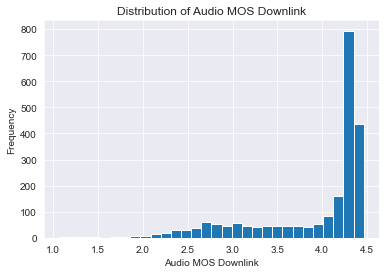

In [9]:
df['Audio MOS Downlink-Audio DL MOS'].hist(bins=30)
plt.xlabel('Audio MOS Downlink')
plt.ylabel('Frequency')
plt.title('Distribution of Audio MOS Downlink')
plt.show()

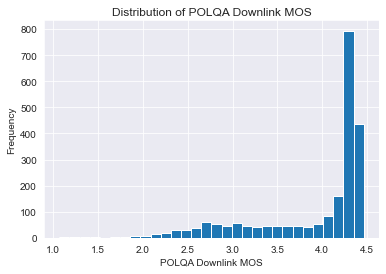

In [10]:
df['Audio  Quality.POLQA Downlink MOS-POLQA NB'].hist(bins=30)
plt.xlabel('POLQA Downlink MOS')
plt.ylabel('Frequency')
plt.title('Distribution of POLQA Downlink MOS')
plt.show()


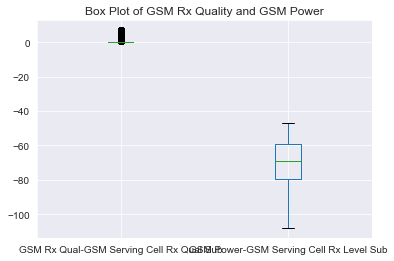

In [11]:
df.boxplot(column=['GSM Rx Qual-GSM Serving Cell Rx Qual Sub', 'GSM Power-GSM Serving Cell Rx Level Sub'])
plt.title('Box Plot of GSM Rx Quality and GSM Power')
plt.show()


GSM quality metrics

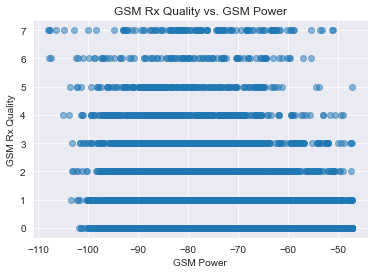

In [14]:
plt.scatter(df['GSM Power-GSM Serving Cell Rx Level Sub'], df['GSM Rx Qual-GSM Serving Cell Rx Qual Sub'], alpha=0.5)
plt.xlabel('GSM Power')
plt.ylabel('GSM Rx Quality')
plt.title('GSM Rx Quality vs. GSM Power')
plt.show()


Time based Analysis

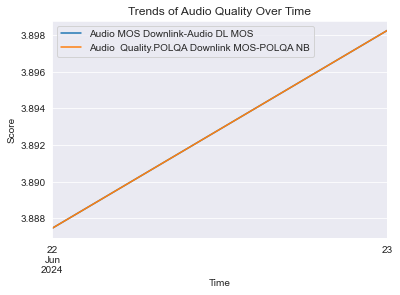

In [15]:
df['Bin Time Stamp'] = pd.to_datetime(df['Bin Time Stamp'])
df.set_index('Bin Time Stamp').resample('D').mean().plot(y=['Audio MOS Downlink-Audio DL MOS', 'Audio  Quality.POLQA Downlink MOS-POLQA NB'])
plt.xlabel('Time')
plt.ylabel('Score')
plt.title('Trends of Audio Quality Over Time')
plt.show()


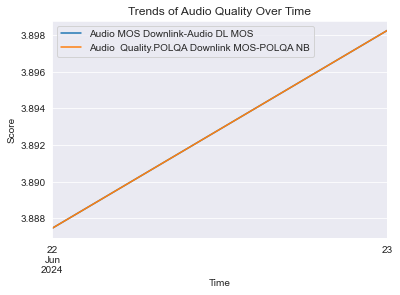

In [16]:
df['Bin Time Stamp'] = pd.to_datetime(df['Bin Time Stamp'])
df.set_index('Bin Time Stamp').resample('D').mean().plot(y=['Audio MOS Downlink-Audio DL MOS', 'Audio  Quality.POLQA Downlink MOS-POLQA NB'])
plt.xlabel('Time')
plt.ylabel('Score')
plt.title('Trends of Audio Quality Over Time')
plt.show()


Categorical Analysis

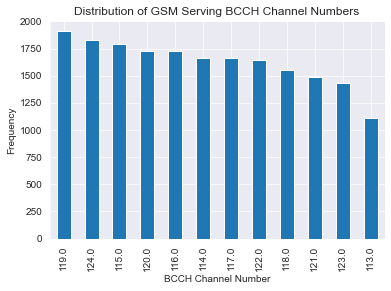

In [17]:
df['GSM-GSM Serving BCCH Channel Number'].value_counts().plot(kind='bar')
plt.xlabel('BCCH Channel Number')
plt.ylabel('Frequency')
plt.title('Distribution of GSM Serving BCCH Channel Numbers')
plt.show()


Text(0.5, 1.0, 'GSM Rx Quality Distribution')

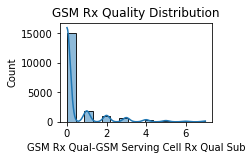

In [12]:
# GSM Rx Quality Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['GSM Rx Qual-GSM Serving Cell Rx Qual Sub'], kde=True)
plt.title('GSM Rx Quality Distribution')


Text(0.5, 1.0, 'GSM Power Distribution')

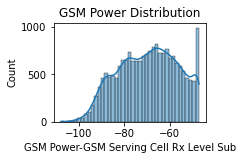

In [14]:
# GSM Power Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['GSM Power-GSM Serving Cell Rx Level Sub'], kde=True)
plt.title('GSM Power Distribution')

Text(0.5, 1.0, 'GSM Serving BCCH Channel Number Distribution')

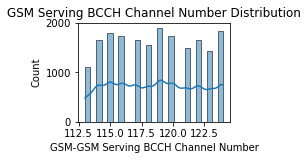

In [15]:
# GSM Serving BCCH Channel Number Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['GSM-GSM Serving BCCH Channel Number'], kde=True)
plt.title('GSM Serving BCCH Channel Number Distribution')

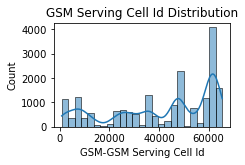

In [19]:
# GSM Serving Cell Id Distribution
plt.subplot(2, 2, 4)
sns.histplot(df['GSM-GSM Serving Cell Id'], kde=True)
plt.title('GSM Serving Cell Id Distribution')
plt.tight_layout()
plt.show()

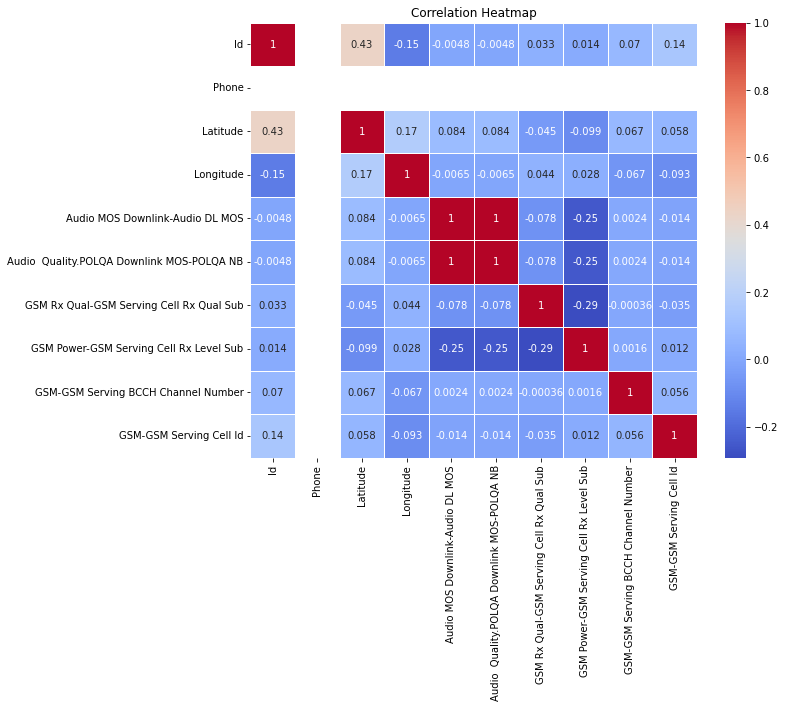

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

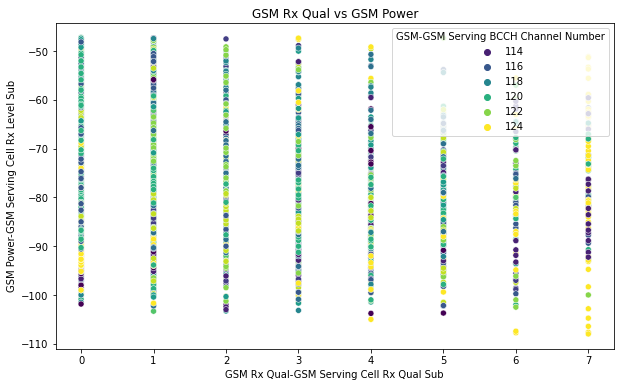

In [21]:
# Scatter plot for GSM Rx Qual vs GSM Power
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GSM Rx Qual-GSM Serving Cell Rx Qual Sub', y='GSM Power-GSM Serving Cell Rx Level Sub', hue='GSM-GSM Serving BCCH Channel Number', palette='viridis')
plt.title('GSM Rx Qual vs GSM Power')
plt.show()

{'0 to -65': 39.78, '-75 to -65': 24.83, '-85 to -75': 21.04, '-95 to -85': 13.03, '-110 to -95': 1.32, '-150 to -110': 0.0}


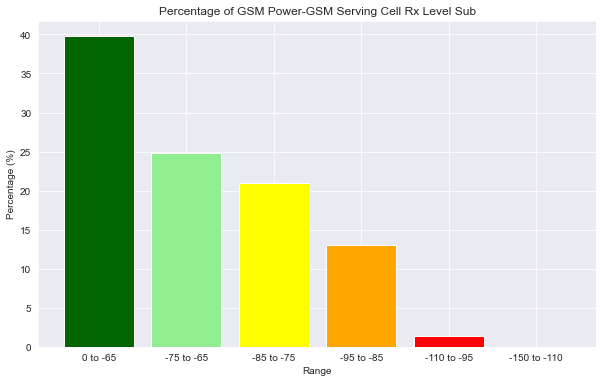

count    19526.000000
mean       -69.530989
std         12.921216
min       -108.000000
25%        -79.500000
50%        -69.000000
75%        -59.290000
max        -47.200000
Name: GSM Power-GSM Serving Cell Rx Level Sub, dtype: float64


In [35]:
# Drop rows with NaN values in 'GSM Power-GSM Serving Cell Rx Level Sub' column
df.dropna(subset=['GSM Power-GSM Serving Cell Rx Level Sub'], inplace=True)

dic = {"0 to -65": 0, "-75 to -65": 0, "-85 to -75": 0, "-95 to -85": 0, "-110 to -95": 0, "-150 to -110": 0}
length = df.shape[0]

for val in df['GSM Power-GSM Serving Cell Rx Level Sub']:
    if val >= -65:
        dic["0 to -65"] += 1
    elif val >= -75:
        dic["-75 to -65"] += 1
    elif val >= -85:
        dic["-85 to -75"] += 1
    elif val >= -95:
        dic["-95 to -85"] += 1
    elif val >= -110:
        dic["-110 to -95"] += 1
    else:
        dic["-150 to -110"] += 1

for key in dic:
    dic[key] = round(dic[key] / length * 100, 2)  # Convert to percentage and round to 2 decimal places

print(dic)


colors = ['darkgreen', 'lightgreen', 'yellow', 'orange', 'red', 'black']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(dic.keys(), dic.values(), color=colors)
plt.xlabel('Range')
plt.ylabel('Percentage (%)')
plt.title('Percentage of GSM Power-GSM Serving Cell Rx Level Sub')
plt.show()
print(df['GSM Power-GSM Serving Cell Rx Level Sub'].describe())

In [ ]:
rsrp_colors = {
    'Excellent': 'green',
    'Very Good': 'blue',
    'Good': 'orange',
    'Bad': 'red',
    'Poor': 'white'
}

throughput_colors = {
    'Excellent': 'darkgreen',
    'Good': 'limegreen',
    'Fair': 'yellowgreen',
    'Poor': 'darkred'
}

plt.figure(figsize=(14, 7))
for legend, color in rsrp_colors.items():
    subset = df[df['RSRP Legend'] == legend]
    plt.scatter(subset['Longitude'], subset['Latitude'], color=color, label=f'RSRP: {legend}', alpha=0.7)

plt.legend(title='RSRP Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of RSRP Legend')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
for legend, color in throughput_colors.items():
    subset = df[df['Throughput Legend'] == legend]
    plt.scatter(subset['Longitude'], subset['Latitude'], color=color, label=f'Throughput: {legend}', alpha=0.7)

plt.legend(title='Throughput Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Throughput Legend')
plt.grid(True)
plt.tight_layout()
plt.show()


19294
{'0 to 3': 18540, '3 to 5': 536, '5 to 7': 218, '7 to 20': 0}
{'0 to 3': 96.09, '3 to 5': 2.78, '5 to 7': 1.13, '7 to 20': 0.0}


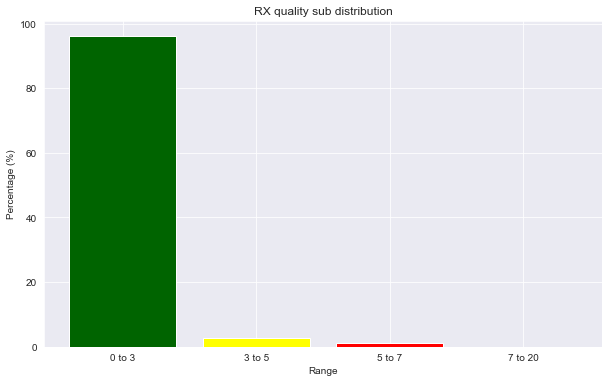

count    19294.000000
mean         0.497149
std          1.181224
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: GSM Rx Qual-GSM Serving Cell Rx Qual Sub, dtype: float64


In [42]:
df.dropna(subset=['GSM Rx Qual-GSM Serving Cell Rx Qual Sub'], inplace=True)

dic = {"0 to 3": 0, "3 to 5": 0, "5 to 7": 0, "7 to 20": 0}
length = df.shape[0]
print(length)
for val in df['GSM Rx Qual-GSM Serving Cell Rx Qual Sub']:
    if val <= float(3):
        dic["0 to 3"] += 1
    elif val <= float(5):
        dic["3 to 5"] += 1
    elif val <= float(7):
        dic["5 to 7"] += 1
    else:
        dic["7 to 20"] += 1
print(dic)
for key in dic:
    dic[key] = round(dic[key] / length * 100, 2)  # Convert to percentage and round to 2 decimal places

print(dic)


colors = ['darkgreen',  'yellow',  'red', 'black']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(dic.keys(), dic.values(), color=colors)
plt.xlabel('Range')
plt.ylabel('Percentage (%)')
plt.title('RX quality sub distribution')
plt.show()
print(df['GSM Rx Qual-GSM Serving Cell Rx Qual Sub'].describe())

2212
{'4 to 5': 1484, '3 to 4': 412, '2 to 3': 290, '1 to 2': 26, '0 to 1': 0}
{'4 to 5': 67.09, '3 to 4': 18.63, '2 to 3': 13.11, '1 to 2': 1.18, '0 to 1': 0.0}


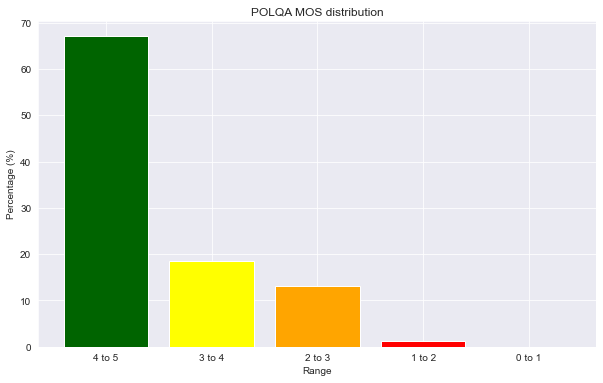

count    2212.000000
mean        3.894543
std         0.664837
min         1.070000
25%         3.560000
50%         4.270000
75%         4.330000
max         4.460000
Name: Audio  Quality.POLQA Downlink MOS-POLQA NB, dtype: float64


In [44]:
df.dropna(subset=['Audio  Quality.POLQA Downlink MOS-POLQA NB'], inplace=True)

dic = {"4 to 5": 0, "3 to 4": 0, "2 to 3": 0, "1 to 2": 0, "0 to 1": 0}
length = df.shape[0]
print(length)
for val in df['Audio  Quality.POLQA Downlink MOS-POLQA NB']:
    if val >=4:
        dic["4 to 5"] += 1
    elif val >= 3:
        dic["3 to 4"] += 1
    elif val >=2:
        dic["2 to 3"] += 1
    elif val >= 1:
        dic["1 to 2"] += 1
    else:
        dic["-150 to 1"] += 1
print(dic)
for key in dic:
    dic[key] = round(dic[key] / length * 100, 2)  # Convert to percentage and round to 2 decimal places

print(dic)


colors = ['darkgreen',  'yellow','orange',  'red', 'black']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(dic.keys(), dic.values(), color=colors)
plt.xlabel('Range')
plt.ylabel('Percentage (%)')
plt.title('POLQA MOS distribution')
plt.show()
print(df['Audio  Quality.POLQA Downlink MOS-POLQA NB'])